In [5]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Uploading training data into the dataframe named as df
train_data = pd.read_csv("C:/Users/arora/OneDrive/Desktop/CIND 820/Literature Review/Dataset/Training.csv")
test_data = pd.read_csv("C:/Users/arora/OneDrive/Desktop/CIND 820/Literature Review/Dataset/Testing (1).csv")

In [7]:
#drop the column which has NaN values in the dataset (Unnamed: 133)
train_data.dropna(how="all",axis=1,inplace=True)

# Feature Selection(Recursive Feature Elimination)

In [4]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Separate the features (X) and target variable (y)
X = test_data.drop('prognosis', axis=1)  # Replace 'target_column' with the actual column name
y = test_data['prognosis']

# Create an instance of the model you want to use for feature selection
model = LogisticRegression()

# Create an instance of the Recursive Feature Elimination (RFE) selector
selector = RFE(model, n_features_to_select=20)  # Specify the number of features to select

# Fit the selector on the data
selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['itching', 'skin_rash', 'chills', 'joint_pain', 'vomiting', 'fatigue',
       'lethargy', 'cough', 'high_fever', 'sweating', 'headache',
       'yellowish_skin', 'nausea', 'loss_of_appetite', 'abdominal_pain',
       'diarrhoea', 'yellowing_of_eyes', 'chest_pain', 'excessive_hunger',
       'irritability'],
      dtype='object')


# Feature Importance

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Separate the features (X) and target variable (y)
X = train_data.drop('prognosis', axis=1)  # Replace 'target_column' with the actual column name
y = train_data['prognosis']

# Create an instance of the Random Forest classifier
model = RandomForestClassifier()

# Train the Random Forest model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importances =  pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances in a table format
print('Feature Importances:')
print(feature_importances.to_string())


Feature Importances:
                            Feature  Importance
97                      muscle_pain    0.017105
41                       mild_fever    0.016536
33                       dark_urine    0.015598
0                           itching    0.015365
11                         vomiting    0.014133
106                  family_history    0.013750
43                yellowing_of_eyes    0.013659
34                           nausea    0.013458
25                       high_fever    0.013240
109           lack_of_concentration    0.013216
14                          fatigue    0.012616
86                     unsteadiness    0.012390
99              red_spots_over_body    0.012038
91         continuous_feel_of_urine    0.011936
56                       chest_pain    0.011758
58                  fast_heart_rate    0.011190
98                altered_sensorium    0.011122
6                        joint_pain    0.011098
28                         sweating    0.011000
5                  

The feature "fluid_overload" has a feature importance of 0.0, which means that it is not a significant predictor of the
disease. This is likely because fluid overload is a symptom of many different diseases, so it is not specific enough to
be a reliable predictor.

In [8]:
# Split the training data into features (X) and target variable (y)
X_train = train_data.drop('prognosis', axis=1)  # Replace 'target_column' with the actual column name
y_train = train_data['prognosis']

# Split the testing data into features (X) and target variable (y)
X_test = test_data.drop('prognosis', axis=1)  # Replace 'target_column' with the actual column name
y_test = test_data['prognosis']

# Hyperparameter Tuning

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



# Create a grid of hyperparameters
param_grid = {
    "C": np.linspace(0.1, 10.0, 10),
    "penalty": ["l1", "l2"],
}

# Create a logistic regression classifier
clf = LogisticRegression()

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'C': 0.1, 'penalty': 'l2'}


# 2nd Iteration (LR)

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



# Create a grid of hyperparameters
param_grid = {
    "C": np.linspace(0.1, 10.0, 10),
    "penalty": ["l1", "l2"],
}

# Create a logistic regression classifier
clf = LogisticRegression()

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Retrain the model with the best hyperparameters
clf = LogisticRegression(**best_params)
clf.fit(X_train, y_train)

# Get the accuracy of the model
accuracy_lr2 = clf.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy_lr2)


Accuracy: 1.0


# Hyperparameter Tuning Random Forest

In [12]:
from sklearn.model_selection import GridSearchCV


# Define the model
model = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = best_model.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9761904761904762


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 4, 8],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = best_model.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9761904761904762


# 2nd Iteration Random Forest

In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert the symptoms to binary values
for col in train_data.columns:
    if col != "prognosis":
        train_data[col] = train_data[col].astype("int8")

# Create the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(train_data.drop("prognosis", axis=1), train_data["prognosis"])

# Predict the labels for the test data
y_pred = rf.predict(train_data.drop("prognosis", axis=1))

# Calculate the accuracy, precision, recall, and F-1 score
accuracy_rf2 = accuracy_score(train_data["prognosis"], y_pred)
precision = precision_score(train_data["prognosis"], y_pred, average="macro")
recall = recall_score(train_data["prognosis"], y_pred, average="macro")
f1 = f1_score(train_data["prognosis"], y_pred, average="macro")

# Print the results
print("Accuracy:", accuracy_rf2)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [13]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create the hyperparameters to tune
param_grid = {
    "kernel": ["linear", "rbf"],
    "C": np.logspace(-3, 3, 10),
    "gamma": np.logspace(-3, 3, 10),
}

# Create the SVM classifier
svm = SVC()

# Create the grid search object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)


{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}


# 2nd Iteration SVC

In [12]:
import numpy as np
from sklearn.svm import SVC

# Create the SVC classifier
svm = SVC(C=0.001, gamma=0.001, kernel='linear')

# Fit the SVC classifier to the training data
svm.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy_svc2 = np.mean(y_pred == y_test)

# Print the accuracy
print("Accuracy:", accuracy_svc2)


Accuracy: 1.0


In [14]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create the hyperparameters to tune
param_grid = {
    "n_neighbors": np.arange(1, 100),
    "weights": ["uniform", "distance"],
    "p": [1, 2],
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)


{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


# 2nd Iteration KNN

In [11]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=1, p=1, weights='uniform')

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy_knn2 = np.mean(y_pred == y_test)

print("Accuracy:", accuracy_knn2)


Accuracy: 1.0


In [10]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Create the hyperparameters to tune
param_grid = {
    "var_smoothing": np.logspace(-9, -2, 10),
}

# Create the naive Bayes classifier
nb = GaussianNB()

# Create the grid search object
grid_search = GridSearchCV(nb, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)


{'var_smoothing': 1e-09}


# 2nd Iteration Naive Bayes

In [9]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

# Create the Gaussian naive Bayes classifier
nb = GaussianNB(var_smoothing=1e-09)

# Fit the classifier to the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Calculate the accuracy
accuracy_nb2 = np.mean(y_pred == y_test)

print("Accuracy:", accuracy_nb2)


Accuracy: 1.0


In [16]:
models2 = pd.DataFrame({
    'Model':['Logistic Regression','Random Forest', 'KNN Regression',  'Support Vector','Naive Bayes' ],
    'Accuracy' :[accuracy_lr2, accuracy_rf2, accuracy_knn2, accuracy_svc2, accuracy_nb2 ],
})
models2 = models2.sort_values(by='Accuracy', ascending=False)

In [17]:
models2

,Model,Accuracy
0,Logistic Regression,1.0
1,Random Forest,1.0
2,KNN Regression,1.0
3,Support Vector,1.0
4,Naive Bayes,1.0


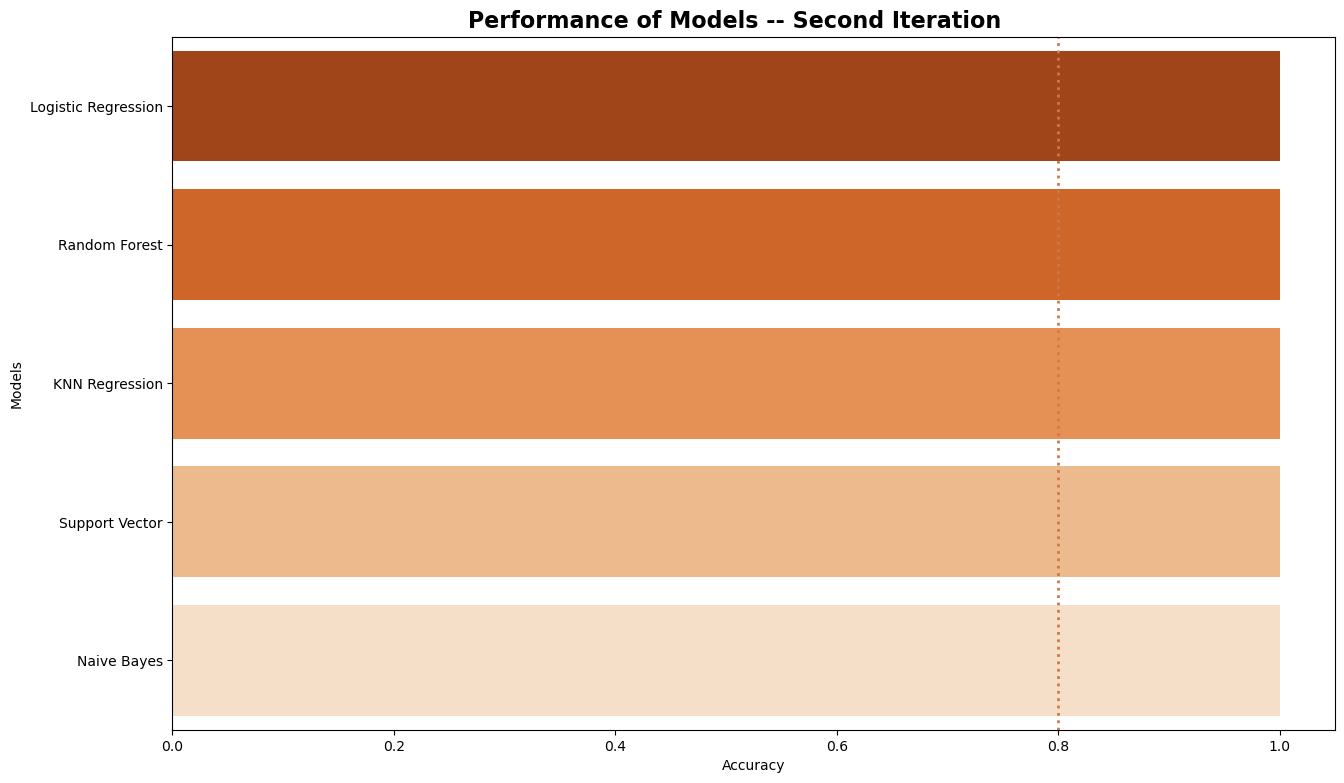

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig = plt.figure(figsize=(15,9))

ax = sns.barplot(data=models2, 
                 y='Model', 
                 x='Accuracy',
                 palette = 'Oranges_r')

ax.figure.suptitle('Performance of Models -- Second Iteration',y=0.91, size = 16, color = 'black', weight='bold');

plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.axvline(x = 0.8, ymin = 0, ymax = 1,
            linewidth = 2, linestyle =":",
            color ='#cf7849');
     

# AUC-ROC Curve

The AUC-ROC curve is commonly used for binary classification problems. However, it can be adapted to multiclass classification by using a one-vs-rest approach or by computing the average AUC-ROC for each class.

In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression



# Separate the symptoms and prognosis
X = train_data.iloc[:, :-1]  # Assuming symptoms are in all columns except the last one
y = train_data.iloc[:, -1]  # Assuming prognosis is in the last column



# Convert multiclass prognosis into binary labels using one-hot encoding
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)

# Create a binary classifier using One-vs-Rest strategy
classifier = OneVsRestClassifier(LogisticRegression())

# Train the model
classifier.fit(X_train, y_train_bin)

# Predict probabilities for each class in the test set
y_scores = classifier.predict_proba(X_test)

# Compute the AUC-ROC score for each class
auc_scores = roc_auc_score(lb.transform(y_test), y_scores, average=None)

# Compute the average AUC-ROC score
average_auc = np.mean(auc_scores)

# Print the AUC-ROC score for each class and the average AUC-ROC score
for i, class_label in enumerate(lb.classes_):
    print(f"Class: {class_label}\t AUC-ROC Score: {auc_scores[i]}")

print("Average AUC-ROC Score:", average_auc)


Class: (vertigo) Paroymsal  Positional Vertigo	 AUC-ROC Score: 1.0
Class: AIDS	 AUC-ROC Score: 1.0
Class: Acne	 AUC-ROC Score: 1.0
Class: Alcoholic hepatitis	 AUC-ROC Score: 1.0
Class: Allergy	 AUC-ROC Score: 1.0
Class: Arthritis	 AUC-ROC Score: 1.0
Class: Bronchial Asthma	 AUC-ROC Score: 1.0
Class: Cervical spondylosis	 AUC-ROC Score: 1.0
Class: Chicken pox	 AUC-ROC Score: 1.0
Class: Chronic cholestasis	 AUC-ROC Score: 1.0
Class: Common Cold	 AUC-ROC Score: 1.0
Class: Dengue	 AUC-ROC Score: 1.0
Class: Diabetes 	 AUC-ROC Score: 1.0
Class: Dimorphic hemmorhoids(piles)	 AUC-ROC Score: 1.0
Class: Drug Reaction	 AUC-ROC Score: 1.0
Class: Fungal infection	 AUC-ROC Score: 1.0
Class: GERD	 AUC-ROC Score: 1.0
Class: Gastroenteritis	 AUC-ROC Score: 1.0
Class: Heart attack	 AUC-ROC Score: 1.0
Class: Hepatitis B	 AUC-ROC Score: 1.0
Class: Hepatitis C	 AUC-ROC Score: 1.0
Class: Hepatitis D	 AUC-ROC Score: 1.0
Class: Hepatitis E	 AUC-ROC Score: 1.0
Class: Hypertension 	 AUC-ROC Score: 1.0
Class: Hy

The AUC-ROC score is a performance metric used to evaluate the performance of a machine learning model for binary 
classification tasks. A perfect AUC-ROC score is 1.0, which indicates that the model has achieved perfect discrimination
between the positive and negative classes.In the context you provided, each class represents a specific medical condition,
such as AIDS, Acne, Arthritis, etc. The AUC-ROC score of 1.0 for each class suggests that the machine learning model used
for classification has achieved perfect accuracy in distinguishing between individuals with that particular medical
condition (positive class) and those without it (negative class).
Additionally, the average AUC-ROC score of 1.0 indicates that the model has achieved perfect discrimination across all 
the classes mentioned. This implies that the model is highly accurate in classifying the different medical conditions
based on the available input data.
Overall, the AUC-ROC score of 1.0 signifies excellent performance, indicating that the model is highly effective in 
predicting the presence or absence of the mentioned medical conditions.